# NRJ SPECTRA
Spectra per bin of energy

In [11]:
import os

import numpy as np
import pandas as pd
import xarray as xr
import dask.dataframe as dd

# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import geopandas as gpd
# from shapely.geometry import Polygon

%matplotlib inline
from matplotlib import pyplot as plt

import drifters.utils as ut
import pynsitu as pin
from GDP_lib import root_dir, negpos_spectra

In [3]:
from dask.distributed import Client

if True:
    from dask.distributed import Client
    from dask_jobqueue import PBSCluster

    # cluster = PBSCluster(cores=56, processes=28, walltime='04:00:00')
    # cluster = PBSCluster(cores=7, processes=7, walltime='04:00:00')
    cluster = PBSCluster(cores=3, processes=3, walltime="04:00:00")
    w = cluster.scale(jobs=8)
    # from dask_jobqueue import PBSCluster
    # cluster = PBSCluster()
    # w = cluster.scale(jobs=8) # 5 for gps, 8 for argos
else:
    from dask.distributed import LocalCluster

    cluster = LocalCluster()

client = Client(cluster)
client

/home1/datahome/mdemol/.miniconda3/envs/mdenv/lib/python3.9/site-packages/dask_jobqueue/core.py:237: FutureWarning: extra has been renamed to worker_extra_args. You are still using it (even if only set to []; please also check config files). If you did not set worker_extra_args yet, extra will be respected for now, but it will be removed in a future release. If you already set worker_extra_args, extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/home1/datahome/mdemol/.miniconda3/envs/mdenv/lib/python3.9/site-packages/dask_jobqueue/core.py:255: FutureWarning: job_extra has been renamed to job_extra_directives. You are still using it (even if only set to []; please also check config files). If you did not set job_extra_directives yet, job_extra will be respected for now, but it will be removed in a future release. If you already set job_extra_directives, job_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/home1/datahome/mdemol/.min

Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: http://10.148.0.235:8787/status,
Dashboard: http://10.148.0.235:8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.148.0.235:46462,Workers: 0
Dashboard: http://10.148.0.235:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


# Choose key 

In [4]:
key = "gps"  # 'gps' or 'argos'
key2 = "_corrected"  # or '_corrected'
dn = 0.025

In [19]:
zarr = os.path.join(
    root_dir, key + "_nrjspectra_" + str(dn).replace(".", "") + key2 + ".zarr"
)
ds = xr.open_zarr(zarr).persist()
nb = ds.nb_window_bins
ds_n, ds_p = negpos_spectra(ds.drop_vars("nb_window_bins"))
dsnp = (ds_n + ds_p).persist()
dsnp = dsnp.merge(nb)

In [20]:
dsnp

<xarray.Dataset>
Dimensions:         (frequency: 720, ven2: 19)
Coordinates:
  * frequency       (frequency) float64 -0.0 0.01667 0.03333 ... 11.97 11.98
  * ven2            (ven2) float64 0.0125 0.0375 0.0625 ... 0.4125 0.4375 0.4625
Data variables: (12/13)
    E_aen           (ven2, frequency) float64 dask.array<chunksize=(19, 720), meta=np.ndarray>
    E_avxy          (ven2, frequency) float64 dask.array<chunksize=(19, 720), meta=np.ndarray>
    E_axy           (ven2, frequency) float64 dask.array<chunksize=(19, 720), meta=np.ndarray>
    E_err_lonlat    (ven2, frequency) float64 dask.array<chunksize=(19, 720), meta=np.ndarray>
    E_err_lonlatm   (ven2, frequency) float64 dask.array<chunksize=(19, 720), meta=np.ndarray>
    E_err_vevn      (ven2, frequency) float64 dask.array<chunksize=(19, 720), meta=np.ndarray>
    ...              ...
    E_venw2         (ven2, frequency) float64 dask.array<chunksize=(19, 720), meta=np.ndarray>
    E_vxy           (ven2, frequency) float64 dask.array<chunksize=(19, 720), meta=np.ndarray>
    E_vxydiff       (ven2, frequency) float64 dask.array<chunksize=(19, 720), meta=np.ndarray>
    E_vxyw2         (ven2, frequency) float64 dask.array<chunksize=(19, 720), meta=np.ndarray>
    E_xy            (ven2, frequency) float64 dask.array<chunksize=(19, 720), meta=np.ndarray>
    nb_window_bins  (ven2) int64 dask.array<chunksize=(19,), meta=np.ndarray>

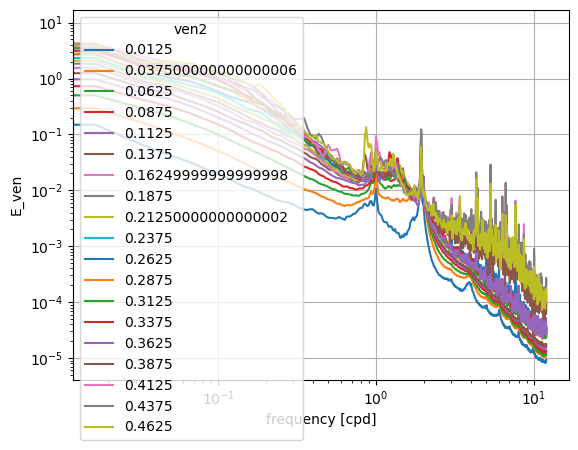

In [25]:
dsnp.E_ven.plot(hue="ven2")
plt.grid()
plt.xscale("log")
plt.yscale("log")

(0.0, 0.5)

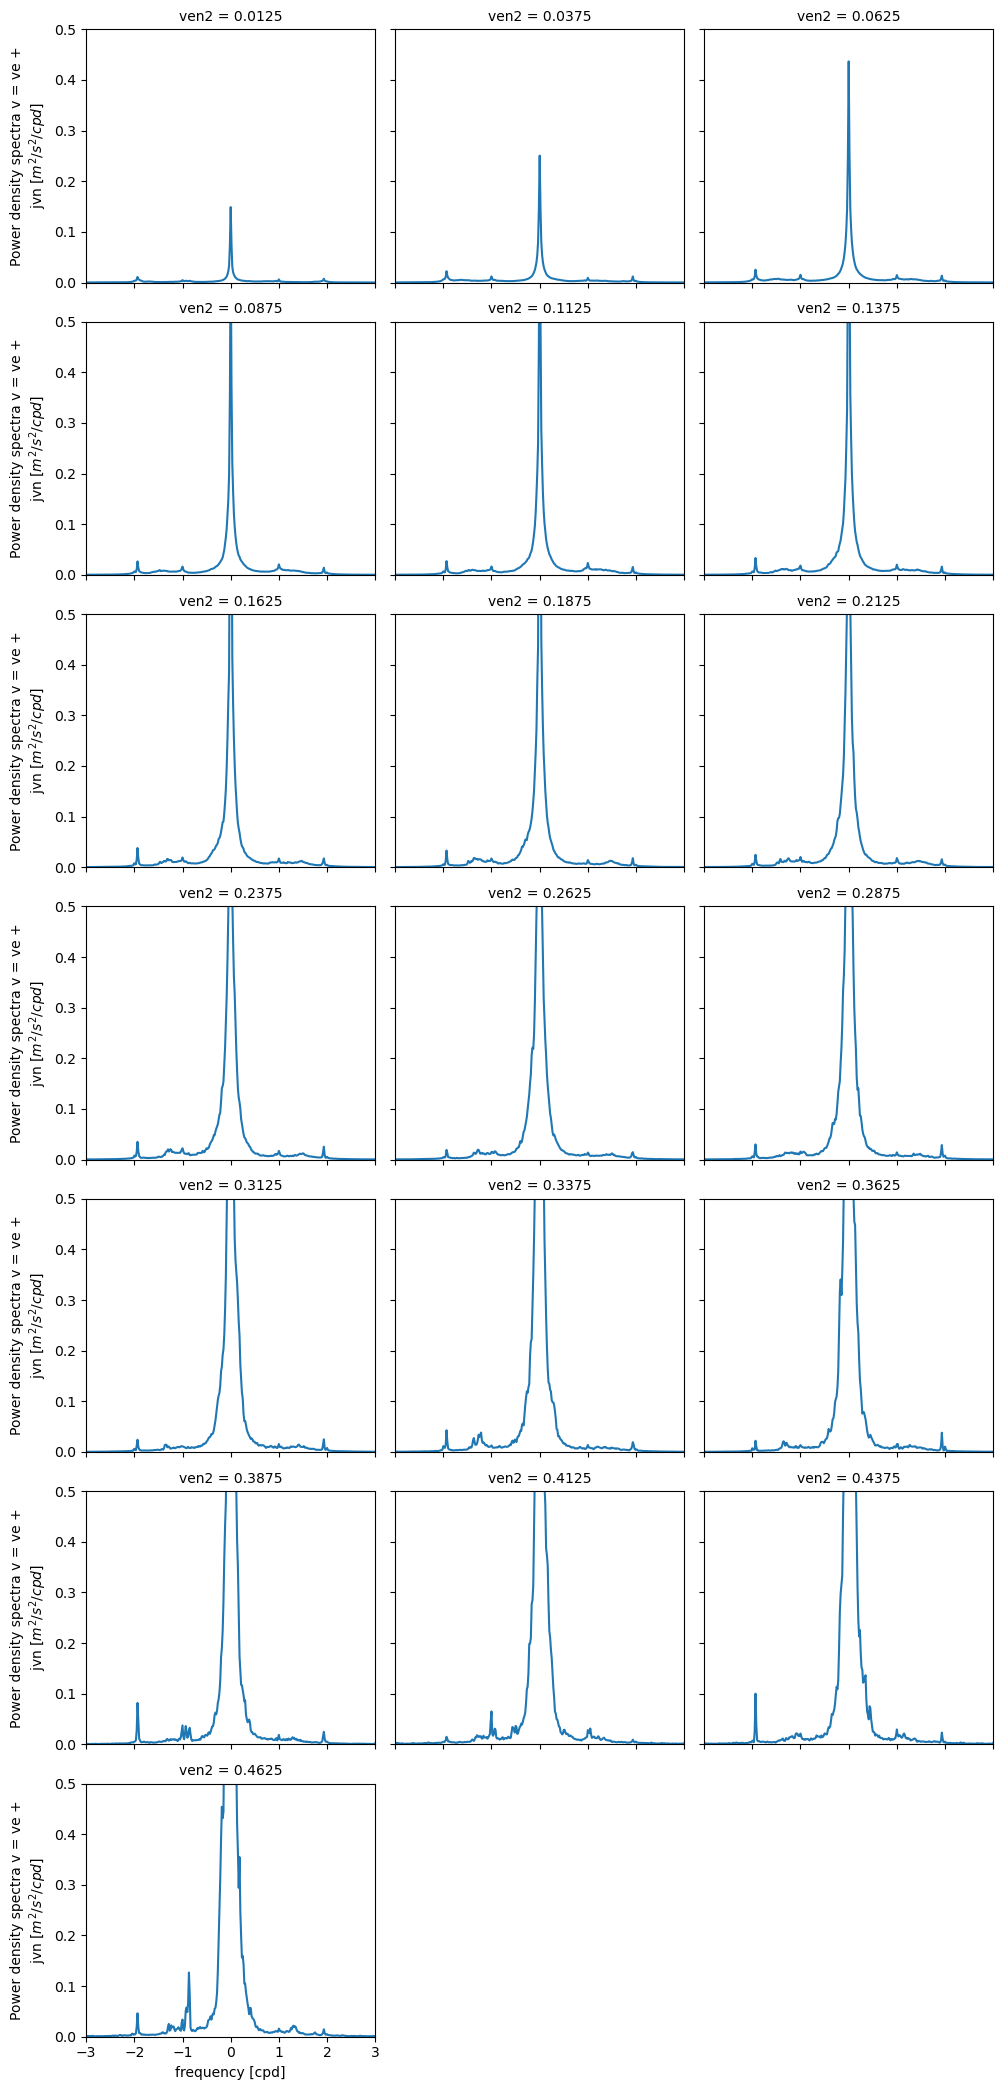

In [27]:
ds.E_ven.plot(col="ven2", col_wrap=3)
plt.xlim(-3, 3)
plt.ylim(0, 0.5)

In [28]:
cluster.close()

/home1/datahome/mdemol/.miniconda3/envs/mdenv/lib/python3.9/site-packages/dask_jobqueue/core.py:237: FutureWarning: extra has been renamed to worker_extra_args. You are still using it (even if only set to []; please also check config files). If you did not set worker_extra_args yet, extra will be respected for now, but it will be removed in a future release. If you already set worker_extra_args, extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/home1/datahome/mdemol/.miniconda3/envs/mdenv/lib/python3.9/site-packages/dask_jobqueue/core.py:255: FutureWarning: job_extra has been renamed to job_extra_directives. You are still using it (even if only set to []; please also check config files). If you did not set job_extra_directives yet, job_extra will be respected for now, but it will be removed in a future release. If you already set job_extra_directives, job_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/home1/datahome/mdemol/.min